## Amey Ashok Sawant 
## 700740611

##### Github Link : https://github.com/amey-13/CS_5170_Machine_Learning
##### Recording Link : https://drive.google.com/drive/u/1/folders/1_coA-xY3dmOk_MEI4UFib6kKpcwRV-WL

### 1. Pandas

In [1]:
# 1. Reading the CSV file data.csv 

import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [2]:
# 2. Showing the basic statistical description

df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [3]:
# 3. Checking if the data has null values and if yes replacing them with mean

df.isnull().any()
df.fillna(df.mean(), inplace=True)
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [4]:
# 4. Selecting Duration and Calories and aggregating the data using: min, max, count, mean.

df.agg({'Duration':['min','max','count','mean'],'Calories':['min','max','count','mean']})

,Duration,Calories
min,15.000000,50.300000
max,300.000000,1860.400000
count,169.000000,169.000000
mean,63.846154,375.790244


In [5]:
# 5. The rows with calories values between 500 and 1000

df.loc[(df['Calories']>500)&(df['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [6]:
# 6. The rows with calories values > 500 and pulse < 100.

df.loc[(df['Calories']>500)&(df['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [7]:
# 7. Creating a new “df_modified” dataframe

df_modified = df[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [8]:
# 8. Deleting the “Maxpulse” column from the main df dataframe

del df['Maxpulse']
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [9]:
# 9. Converting the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(np.int64)
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

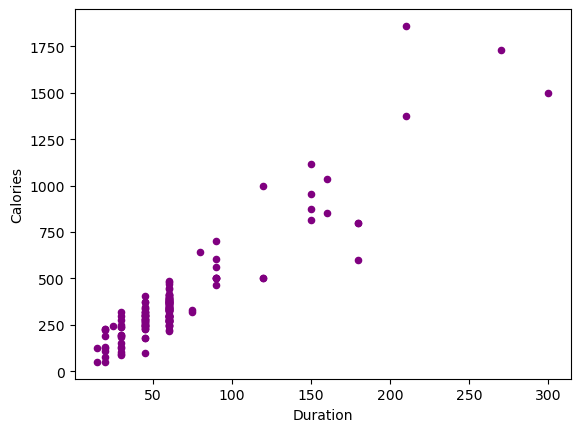

In [10]:
# 10. Creating Scatterplot for the above data

df.plot.scatter(x='Duration',y='Calories',c='Purple')

### 2. Titanic Dataset

In [11]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

/var/folders/jd/kxqwkw_x17339g8hth0jkt600000gn/T/ipykernel_2141/3775494001.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [12]:
# 1. Finding the coorelation between survived and sex column

data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
labelencode = preprocessing.LabelEncoder()
data['Sex'] = labelencode.fit_transform(data.Sex.values)
data['Survived'].corr(data['Sex'])

-0.5433513806577553

In [14]:
matrix = data.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

In [15]:
data.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


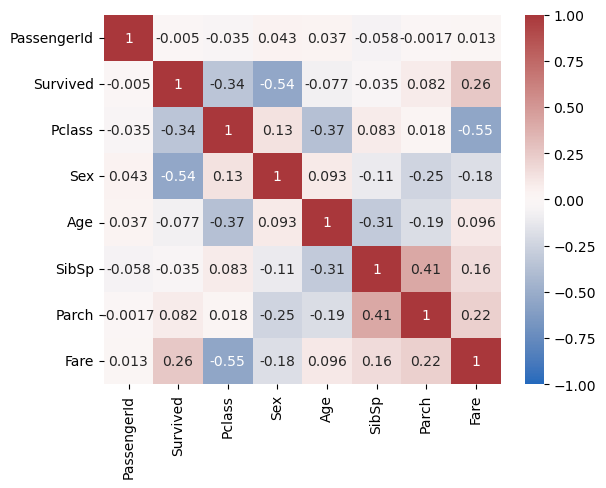

In [16]:
# Using heatmap forming matrix
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [17]:
# Implementing Naïve Bayes method using scikit-learn library.

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Combining the data to analyse and process the set as one.
train_data['train'] = 1
test_data['train'] = 0
data = train_data.append(test_data, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target] + ['train']]

# Categorical values need to be transformed into numeric.
data['Sex'] = data['Sex'].replace(["female", "male"], [0, 1])
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = data.query('train == 1')
test = data.query('train == 0')

In [18]:
# Dropping missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

# Dropping train dataset
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
# Dropping test dataset
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split, cross_validate
# Using train_test_split to create training and testing part
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [20]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
Accuracy is 0.7552447552447552


### 3. Glass Dataset

In [22]:
# Reading glass datasets from glass.csv file and showing it.
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [23]:
# Adding background colours based on their perspective values
glass.corr().style.background_gradient()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


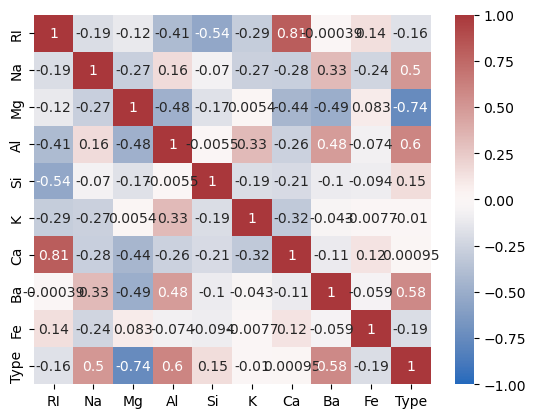

In [24]:
matrixview = glass.corr()
# Using heatmap forming matrix
sns.heatmap(matrixview, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [25]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'

# Using train_test_split to create training and testing part.

X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)
classifier = GaussianNB()

# Checking the fit for both x and y sets 

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_val)

# Summary of predictions made by the classifier

print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))

# Accurate score is been shown in a decimal value

from sklearn.metrics import accuracy_score
print('Naïve Bayes accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
Naïve Bayes accuracy is 0.8372093023255814


In [26]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

# Value prediction for xval and storin it in ypred

y_pred = classifier.predict(X_val)

# Summary of predictions made by the classifier

print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))

# Accuracy score

from sklearn.metrics import accuracy_score
print('Linear SVM accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.90        19
           2       1.00      0.50      0.67        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.44      1.00      0.62         4

    accuracy                           0.67        43
   macro avg       0.38      0.42      0.36        43
weighted avg       0.69      0.67      0.64        43

[[19  0  0  0  0  0]
 [ 4  6  0  1  1  0]
 [ 0  0  0  2  1  3]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  4]]
Linear SVM accuracy is 0.6744186046511628


### Which algorithm you got better accuracy? Can you justify why?

From the abive information, we can infer that between the Naïve Bayes classifier and the SVM classifier, the accuracy of Naïve Bayes is more than that of SVM classifier. This is because of the reason that Naïve Bayes is a probabilistic algorithm and SVM classifier is a non probabilistic algorithm.